<a href="https://colab.research.google.com/github/manuelfernandezdm/Aprendizaje-de-Maquina/blob/main/Machete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING
- Es una rama de la I.A.
- Objetivo: aprender a realizar PREDICCIONES basadas en los DATOS, planteando un modelo que describa el comportamiento del datasheet.


### INDICE:
1. Data Import & Wrangling
2. EDA: Analisis de Datos Exploratorio: Graficas y visualizaciones
3. Modelos
4. Validación de los Modelos
5. Auxiliares

# #1: DARA IMPORT & WRANGLING

Importar las librerias necesarias:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   #para grafciar
import sklearn               #para los modelos

Importar el dataset a un Dataframe de Pandas:

In [ ]:
data = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'   #enlace de github que contiene el dataset de IRIS (flores)
df = pd.read_csv(data)           #header = None: cuando el archivo no tiene nombre de las columnas.

Primera vista del dataset para ver si tiene nombre de columnas, la forma, etc...

In [ ]:
df.head()        #veo las primeras 5 filas del dataset
df.describe()   #resumen de los datos: cantidad, mean, std, min, 25%, 75%, max. Si con un parametro pongo ALL, me tira mas data (buscar)
df.info()       #tipo de dato de cada columna y los valores nulos! NaN
df.columns      #nombre de las columnas (atributos)
df.shape        #tamaño del sataset
df.dtypes       #el tipo de dato de cada columna.

Nombrar o Renombrar las Columnas del dataset:

In [ ]:
# nombro las columnas, asignandoles el nuevo nombre directamente:
df.columns = ['longitud sépalo', 'ancho sépalo', 'longitud pétalo', 'ancho pétalo', 'variedad' ]
# tambien puedo usar el metodo rename, colocando el nombre actual y el nuevo:
df.rename(columns={'longitud sépalo':'long_sep', 'ancho sépalo':'ancho_sep','longitud pétalo':'long_pet', 'ancho pétalo':'ancho_pet'}, inplace=True)

Seteo la columna que se usara como indice (ID de las filas)

In [ ]:
df.set_index('columna_indice', inplace=True)  #si alguna columna funciona como indice. EJ: Paises o DNI o algun otro ID.

Eliminar Columnas

In [ ]:
df_1 = df
# elimino las columnas pasando como parametros los nombres de las columnas:
df_1.drop(['long_sep', 'ancho_sep'], axis=1, inplace=True)    #axis=0: elimino por index(filas)[valor por default], axis=1: elimino por columnas
# tambien puedo eliminarlas asi:
df_1.drop(columns=['ancho_pet'], inplace=True)

Eliminar Filas:

In [ ]:
# Elimino filas segun condicion de alguna columna:
df_setosa = df.drop(df[df['variedad']!='Setosa'].index)   #elimino las filas que no son variedad 'Setosa' en la columna 'variedad'
# Elimino filas que contengan datos NaN (Not a Number)
df_setosa.dropna(subset=['variedad'], axis=0, inplace=True) #elimino las filas que contengan datos NaN en la columna 'variedad'

Reemplazo valores por otros: REPLACE

In [ ]:
# df.replace(valor a reemplazar, nuevo valor)   #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

Cuantas datos nulos contiene cada columna:

In [ ]:
df.isna().sum()

Puedo agregar nuevas columnas al dataframe o modificar alguna existente:

In [ ]:
# creo una nueva columna
df['variedad_2'] = df.sum(axis=1)    #creo una nueva columna con la sumatoria de todos los valores de la fila
# modifico los valores de una columna
df['ancho_pet'] = df['ancho_pet']*10        # multiplico por 10 todos los valores de una columna

<ipython-input-60-8499df98509f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['variedad_2'] = df.sum(axis=1)    #creo una nueva columna con la sumatoria de todos los valores de la fila


Modificar el tipo de una variable:

In [ ]:
# df["Columna"] = df["Columna"].astype("int")     #el tipo de variable de la columna "Columna" es int.

Contar cuantas veces se repiten los valores dentro de una columna

In [ ]:
df['ancho_pet'].value_counts()

Valores nulos por columna:

In [ ]:
df.isnull().sum()

Ordenar las filas segun el valor de una de sus columnas:


In [ ]:
df.sort_values(['ancho_pet'], ascending=False, axis=0, inplace=True)    #ordeno de mayor a menor las filas segun su valor en la columna 'ancho_pet'.

Binning: Agrupo valores numericos en categorias

In [ ]:
bins = np.linspace(min(df['ancho_pet']), max(df['ancho_pet']), 4)    #cant_bins: si pongo 4, me separa en 3 grupos(4 son los cortes)
group_names = ["Grupo1", "Grupo2", "Grupo3"]
df['ancho_pet_bin'] = pd.cut(df['ancho_pet'], bins, labels=group_names, include_lowest=True)  #https://pandas.pydata.org/docs/reference/api/pandas.cut.html

Seleccionar data dentro del Dataframe:

In [ ]:
# df.loc[["Japon", "Irlanda"], ["Habitantes", "Continente"]]    #devuelve un Datafrmae.
#    otra forma es mediante una condicion:
# condicion = df["Continente"] == "Asia"
# df[condicion]

Rellenar valores nulos con el promedio de la columna:

In [ ]:
promedio = round(df['Columna'].nanmean(),3)
df['Columna'].fillna(promedio, inplace=True)

value_counts(): devuelve un df con la cantidad de veces que se repite cada valor de la columna

In [ ]:
df['Columna'].value_counts()

Cambiar una variable categorica por una numerica: replace

In [ ]:
df['campo'].replace(['cat1', 'cat2', ...], [0, 1, ..], inplace=True)

Pasar variables categoricas a varias columnas de 0 y 1:

In [ ]:
features = ['columna1', 'columna2', ...]
x = pd.get_dummies(dataframe[features])

sexo: female, male -->      female    male
                                1       0
                                0       1

Reemplazar la columna categorica por la de get_dummies:

In [ ]:
nuevo_df = pd.concat([viejo_df.drop("Embarked", axis = 1),df_get_dummies], axis = 1)

### Estandarizacion de atributos:

Se estandarizan los atributo para que exista una escala comun y que sea mas facil compararlos. Esto permite que cada variable tenga una influencia similar en el modelo, lo que permite que sea mas estable.

In [ ]:
from sklearn.preprocessing import StandardScaler

#standard Scaler: convierte los valores de las columnas al rango [-1, 1], para que todas las variables tengan la misma influencia.
scaler = StandardScaler()
scaler.fit(X)
X_norm = pd.Dataframe(scaler.transfrom(X), columns=X.columns)

# normalizacion de los datos de las columnas:
def get_normal(variable):
  variable = variable/variable.max()
  return variable

for var in dataframe.columns:
    if var != 'mode':
      dataframe[var] = get_normal(dataframe[var])

### Label Encoder

Convierte una lista de datos de texto en valores numericos (atributos no numericos a numericos)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder ()
df['Columna'] = le.fit_transform(df['Columna'])

### Comprobar si los datos se comportan como una distribucion NORMAL

Cuando los datos no se comportan con alguna distribucion parametrica, hay que normalizarlos para que no sesguen el modelo.

In [ ]:
from scipy.stats import stats

def test_result(p,df):
  alpha = [0.001,0.01,0.05,0.1]
  for i in range (len(alpha)):
    if p < alpha[i]:
        return i
  return -1
def check_distribution(df):
  for f in df.columns:
    k2, p = stats.normaltest(df[f])
    isnormal = test_result(p,df)
    if(isnormal == 0):
      print("Hay extremadamente fuerte evidencia para asegurar que la variable casos "+f+" no es normal")
    elif( isnormal == 1):
      print("Hay muy fuerte evidencia para asegurar que la variable de casos "+f+" no es normal")
    elif(isnormal == 2):
      print("Hay fuerte evidencia para asegurar que la variable de casos "+f+" no es normal")
    elif(isnormal == 3):
      print("Hay alguna evidencia para asegurar que la variable de casos "+f+" no es normal")
    elif (isnormal == -1):
      text = "La variable casos "+f+" se puede considerar normal con un "
      interval = round((1-p)*100,2)
      text+=str(interval)
      text+="% de confianza.\n"
      text+=f"Con media = {df[f].mean():.3f}"
      text+=f" y desvío estandar = {df[f].std(ddof=1):.3f}"
      print(text)

# #2 GRÁFICAS Y VISUALIZACIONES

* 1) Area Plots
* 2) Histograms
* 3) Bar Charts
* 4) Pie Charts
* 5) Box Plot
* 6) Scatter Plots
* 7) Waffle Charts
* 8) Word Clouds
* 9) Folium: MAPS
* 10) Los DASH estan muy buenos tambien (html code)

Manlio: https://github.com/manlio99/Materia-de-aprendizaje/blob/master/6_DataViz/1_dataviz_in_python.ipynb

In [ ]:
# Area Plots:
df[['long_sep','ancho_pet']].plot(kind="area")
plt.title("Tiutlo")
plt.ylabel("")
plt.xlabel("")
plt.show()

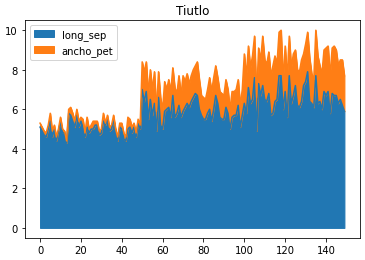

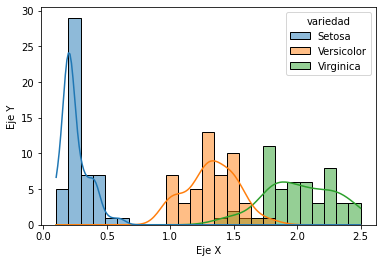

In [ ]:
# Histograma
sns.histplot(data=df, x=df['ancho_pet'], hue=df['variedad'], kde=True, bins=25)  #kde: linea de cada hue(continuo)
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.show()

#histograma de todas las columnas de tipo integer:
pd.hist(bins=10, figsize=(20,10))
#permite ver la distribucion de los registros. Muestra si hay valores anomalos.
# podemos ver a ojo a partir de que numero tenemos valores anomalos y garficar un scatter con esos valores:
big_trees = pd[pd['diametro']>50] #ejemplo de los arboles, selecciono solo los valores out
big_trees[['columna1', 'columna2']].plot(kind='scatter', x='columna1', y='columna2', figsize=(20,10))
# es para ver con mas detalle aquellos valores anomalos y ver como trabajarlos.

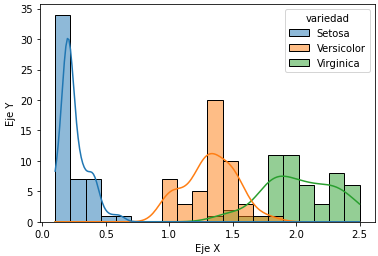

<AxesSubplot:xlabel='variedad', ylabel='ancho_pet'>

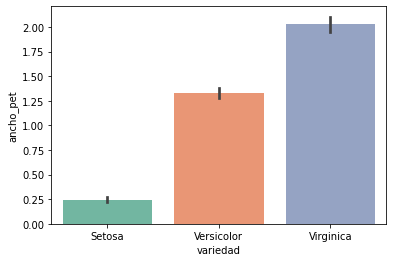

In [ ]:
# Bar plot
sns.barplot(data=df, x=df['variedad'], y=df['ancho_pet'], palette='Set2')

In [ ]:
# Pie chart
df.head()
df_variedad = df.groupby(['variedad']).mean()   #agrupo por la columna 'variedad' y con el promedio de todos los registros pertenecientes a cada categoria
#df_variedad.head()
"""
labels = df_variedad['variedad']
labels
"""
#plt.pie(data=df_variedad, x=df_variedad['long_pet'], autopct='%1.1f%%', labels=labels)

"\nlabels = df_variedad['variedad']\nlabels\n"

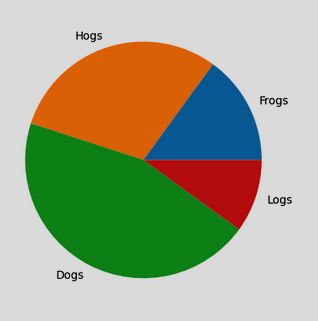

In [ ]:
# Box plot
    # util para encontrar valores atipicos: aquellos que se ecuentran por fuera de los limites.
sns.boxplot(data=df, x=df['long_pet'], palette='Set2')

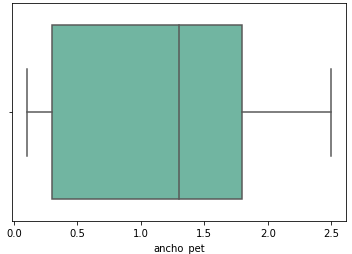

In [ ]:
# Strip plot
#     * util para cuando queremos visualizar puntos de distintas clases: ej:propinas que se hacen segun el dia de la semana.
sns.stripplot(data=df, x=df['variedad'], y=df['long_sep'], hue=df['variedad'], palette='Set2')

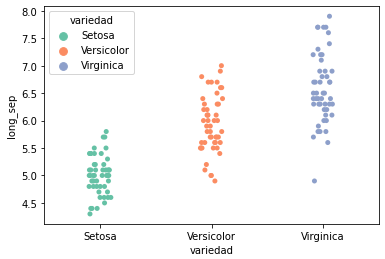

In [ ]:
# Scatter plot
sns.scatterplot(data=df, x=df['ancho_pet'], y=df['long_pet'], hue=df['variedad'], palette='Set2')
plt.title('Titulo')
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.show()

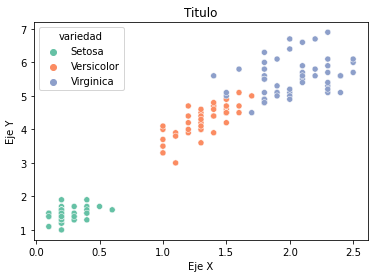

In [ ]:
# Joint plot
    # mezcla un scatter con distribucion
sns.jointplot(data=df, x=df['ancho_pet'], y=df['long_pet'], kind='reg', palette='Set2')    # hue=df['variedad'],

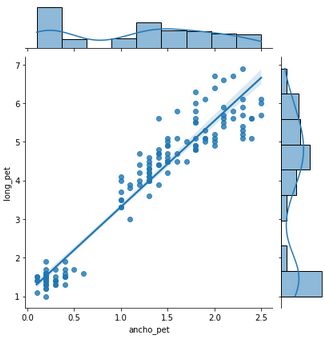

Si en vez de kind='reg' pongo hue=df['variedad']:

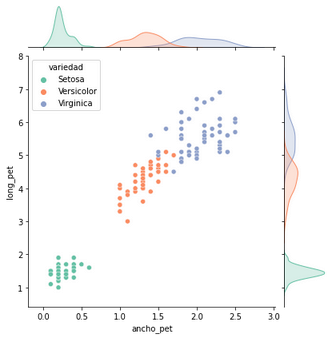

## Correlacion:
* Correlacion de Pearson (valores continuos): [-1,1] y valor P (<0.001): mucha seguridad
* Chi-Square (variables categoricas)

In [ ]:
df_corr = df.corr(method= "pearson")    #devuelve una matriz con todas las correlaciones entre los distintos atributos
sns.heatmap(df_corr, annot=True)    #annot=True permite ver los valores numericos de las correlaciones.

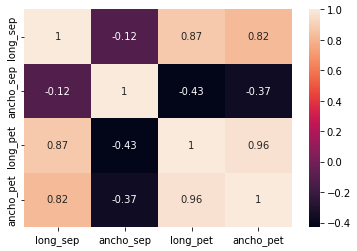

In [ ]:
# Pair plot
    # grafica la relacion entre todos los atributos entre si.
sns.pairplot(df)

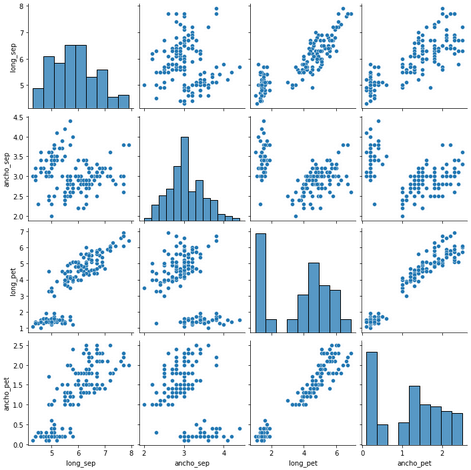

# #3 MODELOS
Ecuacion matematica que describa el conjunto de datos, para predecir su comportamiento.
Se utiliza la libreria Scikit-Learn

## METODOLOGIA:


1.   Elegir el modelo adecuado importando la clase de Sckit-Learn
2.   Elegir los hiperparametros del modelo instanciando la clase con los valores deseados
3.   Organizar los datos en la matriz X e Y: [SUPERVISADO]
  - X: Matriz caracterisitca
  - Y: Matriz destino u objetivo: lo que queremos predecir (etiquetas o valores continuos)
4.   Ajustar el modelo: fit()
5.   Aplicar el modelo a nuevos datos:
  - Supervisado: predict()
  - No supervisado: predict() o transform()

* fit(): este metodo hace que se realicen calculos internos del modelo y los resultaods se almacenan en atributos especificos del objeto. En Scikit-Learn, todos los parametros del modelo que se aprendieron que se aprendieron con el metodo fit() llevan un "_" al final del nombre

## APRENDIZAJE SUPERVISADO
### Los datos estan ETIQUETADOS:
 - CLASIFICACION: las etiquetas son DISCRETAS
 - REGRESION: las etiquetas son CONTINUAS

### CLASIFICADORES:
* Maxima verosimilitud
* Clasificador Bayesiano
* Regresion logistica
* K-Vecinos mas cercanos
* Arboles de decision
* SVM: Support Vector Machine

### REGRESION:
* Regresion lineal
* Regresion No lineal
* SVM

In [ ]:
# Train/Test Dataset:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

NameError: ignored

### CLASIFICADOR BAYESIANO INGENUO GAUSSIANO
Clasificacion Bayesiana: Se basa en el teorema de Bayes: describe la relacion de probabilidades condicionales de cantidades estadisticas.
  * se supone que los datos se comportan como una distribucion Gaussiana simple.
  * en base a las distribuciones Gaussianas (calculadas por el modelo), ante un nuevo punto el modelo determina a que categoria pertenece en base a la probabilidad (elije la categoria con mayor probabilidad).

Ventajas:
  * muy rapido para entrenar/predecir
  * proporciona prediccion probabilistica directa
  * faciles de interpretar
  * tienen muy pocos (o nulos) parametros ajustables

In [ ]:
"""
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

yprob = model.predict_proba(Xtest)
yprob: es un arreglo que indica la probabilidad de que el punto pertenezca a cada categoria.

SyntaxError: ignored

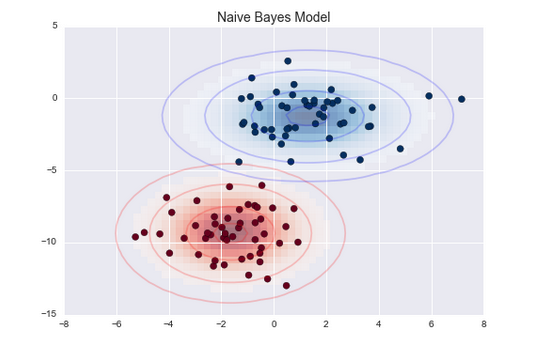

### REGRESION LOGISTICA
* Clasificador BINARIO basico, de los mas sencillo de implementar.
* IDEA: moldeamos la recta de regresion lineal con una sigmoide y aplicamos un valor umbral. z puede ser una funciono lineal multiple o una funcion polinomial. -> g(z) = 1/ (1+e^z)
* Parecido al Naive Bayes pero para VALORES CUANTITATIVOS (numericos)
* Se entrena el modelo con datos de entrenamiento que moldean las curvas del logaritmo, despues solo debemos introducir los nuevos datos en la curva y ver el valor de salida. Se elige la categoria segun el VALOR UMBRAL establecido
* Cualquier otro clasificador que se implementa debe ser mejor que este, sirve como referencia.
* nos devuelve la probabilidad asociada en cada caso.

log ( p / (1 - p) = Bo + B1.X --> p= 1/(1+e^-(Bo+B1.X)
  * entrenando al modelo, hayamos los valores de Bo y de B1 y listo. Bo y B1 son los coeficientes de la regresion lineal !! **("moldeo" la recta de regresion lineal con un sigmoide)**
  * el eje "y" es la probabilidad p

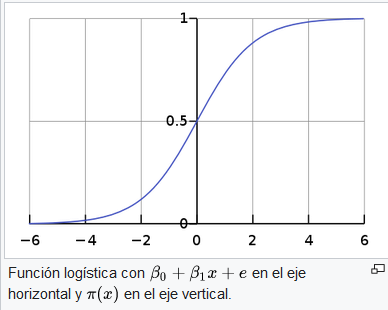
Ej: si el valor umbral lo colocamos en 0.5, para todos los valores de x positivos, nuestra salida de la funcion logaritmica es mayor a 0.5, por lo tanto se clasifican como categoria 1. En este caso hay una sola variable, pero pueden haber varias Xs

In [ ]:
# Modeling
"""
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)    #This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.
LR
"""
# Predicting:
"""
yhat = LR.predict(X_test)
yhat

yhat_prob = LR.predict_proba(X_test)    #predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):
yhat_prob
"""
# Evaluation
"""
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

# Otra manera de evaluar es mediante una matriz de confusion:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')


print (classification_report(y_test, yhat))
"""

### K VECINOS MAS CERCANOS
* se conoce como "aprendizaje perezoso", porque no hay un proceso de entrenamiento. Es el clasificador mas sencillo.
* dado un dato de entrada, se buscan los k que esten a menor distancia en el espacio de atributos y se clasifica por mayoria.

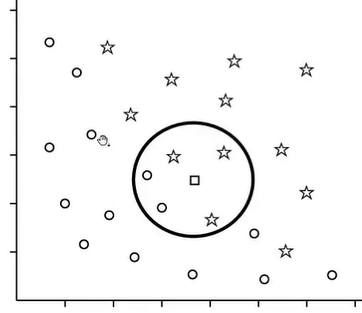

In [ ]:
"""
from sklearn.neighbors import KNeighborsClassifier

k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
"""
# predicting:
"""
yhat = neigh.predict(X_test)
yhat[0:5]
"""
# Accuracy Evaluation
""""
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
"""
# Evaluar modelos con distintos K:
"""
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

# Ploteo los resultados obtenidos:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
"""

### ARBOL DE DECISION
  *Algoritmo NO parametrico: Cada nodo en el arbol divide los datos en dos grupos usando un valor de corte dentro de una de las caracteristicas.
  * IDEA: Busco el atributo mas significativo (ganancia de informacion) como primera pregunta del arbol, y asi sucesivamente.
    * como? --> Evaluando la ENTROPIA (Medida de desorden)
      * Pruebo separando el dataset segun todas las columnas y mido la entropia que me genera cada division, y me quedo con la de menor entropia: <br> E: -p(B).log2(p(B)) - p(A).log2(p(A)) </br>
      * ahora tengo 2 datasets, y vuelvo a hacer lo mismo con cada uno.
* ventajas:
      * funcionamiento transparente
      * poca preparacion de los datos
      * robusto frente a variables co-dependientes
* desventajas:
      * se adaptan demasiado a los datos de entrenamiento

El arbol de decision no trabaja con valores categoricos, se deben pasar a valores numericos.

In [ ]:
# import
"""
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
"""
# Pre-processing    Separa el df en X y en Y(Target).
"""

Pre-processing

Using my_data as the Drug.csv data read by pandas, declare the following variables:

    X as the Feature Matrix (data of my_data)
    y as the response vector (target)

Remove the column containing the target name since it doesn't contain numeric values.

X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]
"""
# cambiar valores categoricos por numericos:
"""
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])
"""
# Setting up the decision tree:
"""
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
"""
# Modeling
#   El criterio del arbol es entropia, como se vio en la teoria:
#     lograr la mayor ganancia de informacion con cada division
"""
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

drugTree.fit(X_trainset,y_trainset)
"""
# Prediction
"""
predTree = drugTree.predict(X_testset)
"""
# Evaluation
"""
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
"""
#Visualization
#   Devuelve un grafico del arbol, con la division de cada nodo. Muy bueno.
"""
tree.plot_tree(drugTree)
plt.show()
"""

'\ntree.plot_tree(drugTree)\nplt.show()\n'

### BOSQUES ALEATORIOS

 Es una técnica que construye múltiples árboles de decisión y combina sus predicciones para obtener una clasificación más robusta y precisa.

### SVM: SUPPORT VECTOR MACHINE
*  Encontramos una línea o curva (en dos dimensiones) o una variedad (en múltiples dimensiones) que divide las clases entre sí.
* Se basa en 2 ideas fundamentales:
  1. conjunto etiquetado LINEALMENTE separables: es posible encontrar un hiperplano de separacion  optima (que maximice el margen de separacion) y por lo tanto que sea mas inmune al ruido y overfitting.
  2. conjunto etiquetado NO LINEALMENTE separables: se pueden mapear n un espacion de mas dimensiones (usando un KERNEL) donde tal separacion es posible.

1. Linealmente separables: Separacion optima
  * los puntos marcados (ubicados sobre los limites) son los fundamentales para el calculo del algrotimo! son conocidos como los vectores de soporte. Para el calculo de la recta de separacion y los limites SOLO se tienen en cuenta estos puntos, cualquier otro punto que no sea de soporte no infiere en el calculo del modelo !! Si agrego mas puntos alejados del limite, el modelo no varia:


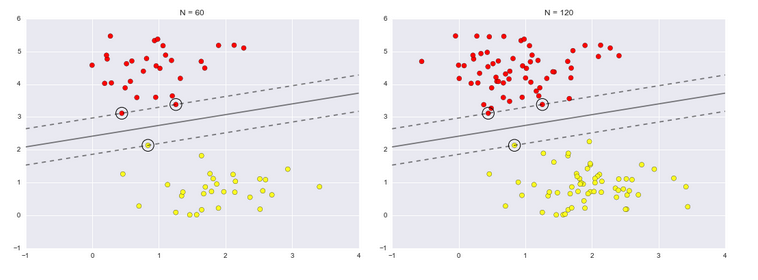

2. Linealmente NO separables:
  * lo que se hace en este caso es utilizar un Kernel para representar nuestros datos de tal manera que sea posible separarlos de manera lineal (un plano o un hiperplano). Para ello se proyectan los datos en una dimension superior.

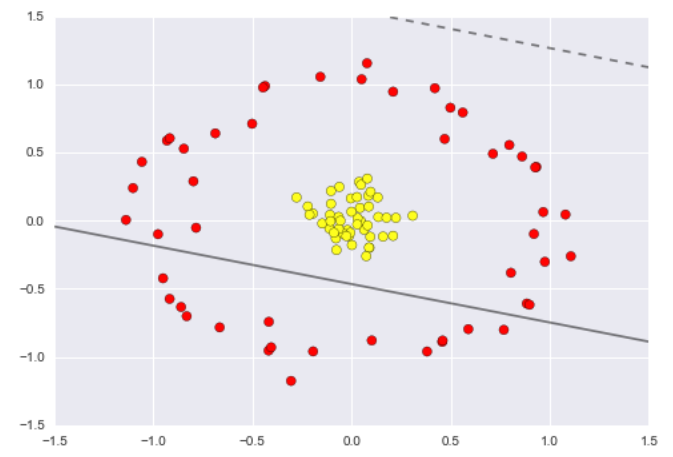
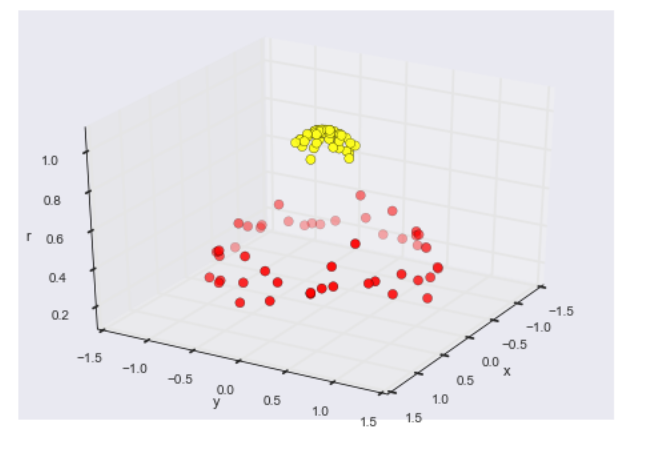

Y ahora si puedo separar los conjuntos de datos de manera lineal --> hiperplano

Juntando varios modelos de SVM, y aplicando capas, puedo armar una red neuronal! Algoritmo de BACKPROPAGATION para disminuir el error de la red.

In [ ]:
# Modeling
#   Kernels disponibles: 1.Linear, 2.Polynomial, 3.Radial basis function (RBF), 4.Sigmoid
"""
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
yhat [0:5]
"""
# Evaluation
"""
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)
"""

## REGRESIÓN:
Modelo supervisado para predecir un valor cuantitativo (numerico)
1.   Lineal Simple
2.  Lineal Multiple
3.  No lineal

### 1. LINEAL SIMPLE
* ajustar los datos mediante una linea recta: y = ax + b
* tengo una sola columna en la matriz caracteristica X.


In [ ]:
"""
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_fit = model.predict(X_test)

# a = model.coef_[0]
# b = model.intercept_
"""

'\nfrom sklearn.linear_model import LinearRegression\nmodel = LinearRegression(fit_intercept=True)\nmodel.fit(X_train, y_train)\ny_fit = model.predict(X_test)\n'

Criterios de calidad:
* Coef. de determinacion R: R = indice de correlacion de Pearson
* Correlacion de spearman (estimador NO parametrico): basada en rangos

Indices de ERROR:
* Error absoluto medio
* RMSE
* SEE

### 2. LINEAL MULTIPLE
* ajustar los datos mediante: y = a0 + a1.x1 + a2.x2 + ...
los coeficientes a1, a2, ... me indican el peso que tiene esa variable xi en el total del modelo:
    * peso de a1 = a1 /(a1 + a2 + a3 +...)
* tengo varias columnas en la matriz caracteristica X.


In [ ]:
# ii] REGRESION LINEAL MULTIPLE
"""
df_corto = df [["Columna1","Columna2","Columna3",...]]    #Selecciono las columnas del dataframe que necesito
msk = np.random.rand(len(df)) < 0.8
train = cf_corto[msk]
test = cf_corto[~msk]
"""
# X son 3 columnas:
"""
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
"""
# Prediccion, suma de los errores residuales al cuadrado y R2.
"""
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
"""

### REGRESION DE FUNCION BASE
* Es una forma de poder adaptar la regresion lineal a relaciones no lineales entre variables:
  * Funciones de base polinomiales
  * Funciones de base Gaussianas

#### Ejs de REGRESION </br> i] Ej de Regresion Lineal Simple completo </br> ii] Ej de Regresion Lineal Multiple </br> iii] Regresion NO LINEAL Simple
Una forma de implementar es "Warpear" los puntos, hacer una regresion lineal y volver a warpear. Por ejemplo, si se que los datos se comportan como una cuadratica, le aplico la funcion inversa a los datos (raiz cuadrada) y hago regresion lineal.

In [ ]:
"""
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]
"""

# i] REGRESION LINEAL SIMPLE
# Divido el dataset en train y test al azar.
"""
msk = np.random.rand(lendf))<0.8    #80% para training, 20% para testear. De este manera las filas se seleccionan al azar.
train = df[msk]
test = df[~msk]]
"""
# Regresion Lineal simple:
"""
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
"""
#grafico la recta hallada por el modelo sobre los datos:
"""
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
"""
# Evaluacion del modelo:
"""
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )
"""

In [ ]:
# Regresion NO LINEAL SIMPLE (X: una sola columna)
"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)       #Polinomio de grado 2
train_x_poly = poly.fit_transform(train_x)  #transform: transforma x a x1, xalcuadrado en x2, ...
train_x_poly
"""
# Usamos regresion lineal para hallar los coeficientes
"""
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)
"""
# Ploteamos el resultado:
"""
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
"""
# Evaluacion
"""
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )
"""

## APRENDIZAJE NO SUPERVISADO
### Los datos NO estan ETIQUETADOS:
 - CLUSTERING: agrupo los datos en grupos o clases
 - REDUCCION DE LA DIMENSIONALIDAD: disminuyo la cantidad de atributos manteniendo el comportamiento del dataset

### PCA: Analisis de Componentes Principales

Es uno de los algoritmos no supervisados mas utilizados. Es un algortimo de reduccio de dimensionalidad, pero tambien puede ser util como herramienta de.
* Visualizacion
* Filtrado de ruido
* Extraccion de caracteristicas e ingenieria
* ...

Desventaja:
* No funciona tan bien cuando existen relaciones NO lineales dentro de los datos.

Usa ejes para describir el conjunto de datos

In [ ]:
from sklearn.decomposition import PCA
# para un numero de dimensiones muy alta, conviene usar la clase RandomizedPCA (contiene un metodo aleatorio para encontrar mas rapidamente las componentes principales)
model_pca = PCA(n_componentes=2)
model_pca.fit(X)    #matriz de caracteristicas
print(model_pca.components_)
print(model_pca.explained_variance_)

"""
# metodo para graficar los ejes resultantes sobre el conjunto de puntos (grafica de abajo)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
"""

Tenemos una nube de datos y el objetivo es representar su comportamiento mediante elpeso que tiene cada componente principal. Aquellas componentes que sean mayores, tendran mas informacion que aquellas componentes de menor tamaño (que pueden ser eliminadas: disminuyendo la dimensionalidad del conjunto de datos manteniendo el comportamiento de los mismos)

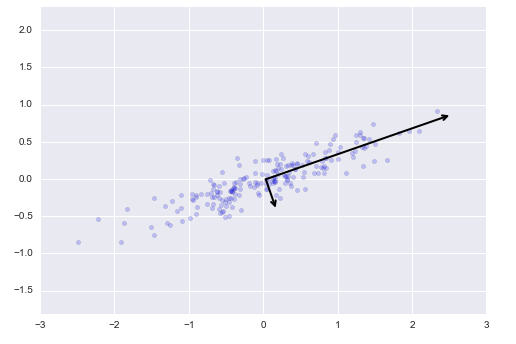

#### PCA como reduccion de dimensionalidad:
La idea es poner a 0 las componentes principales mas pequeñas, l que da como resultado una proyeccion de menor dimension de los datos que conserva la variacion maxima de los mismos.

In [ ]:
# el numero de dimensiones original es de 2: la figura de arriba
pca = PCA(n_components=1) #le indico al modelo que ahora quiero que tenga una sola dimension
pca.fit(X)
X_pca = pca.transform(X)  #X_pca ahora posee los datos proyectados sobre la componente principal: es un ARRAY
# df = pd.DataFrame(my_array, columns = ['Column_A','Column_B','Column_C'])
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

#haciendo la inversa para poder comparar desempeños:
components = model_pca.transform(data)
projected = model_pca.inversa_transform(components)

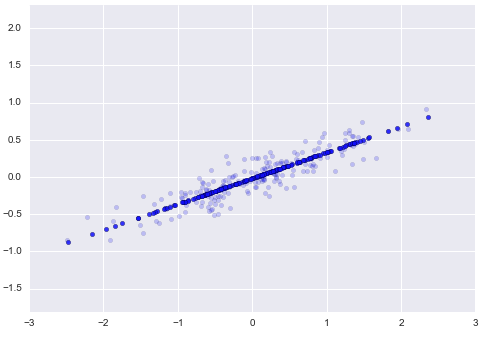

In [ ]:
# Eligiendo el numero de dimensionalidad indicado:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))    #.explained_variance_ratio_ es un vector con el peso de cada componente sobre la varianza total
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

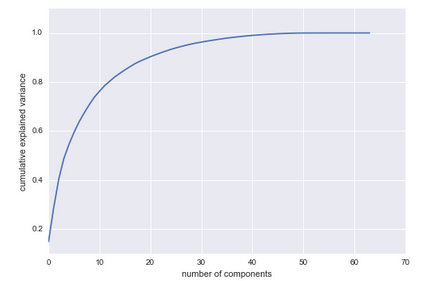

Filtrado de ruido:
  "eliminando las componentes que aportan menos informacion de varianza, estamos eliminando el RUIDO"

## CLUSTERING:
* el objetivo consiste en agrupar el conjunto de registros en agrupamientos o clases por alun criterio en particular (similitud, proximidad, ...)

### K-MEANS
* se basa en iterar asignaciones de centroides a las clases, seguida de una etapa de ajustes:
  * mientras algun patron cambie de grupo, repetir:
    1. Situo (de manera Random o autoritaria) K centroides
    2. Calculo la distancia de cada punto a cada centroide
    3. Asigno cada punto al centroide mas cercano
    4. Recalculo la posicion de cada centroide
    5. Repito los pasos 2-4 hasta que no haya cambios

Este algoritmo converge siempre, aunque depende de las asignacviones iniciales de los centroides. para asegurarnos que converja a la mejor solucion global, se corre el algoritmo varias veces con distintos centroides de partida.

**CARACTERISTICAS**
* Se debe asignar el numero de clusters K al modelo, no es capaz de elegir el numero optimo por si solo.
* Puede ser un poco lento para un gran numero de muestras (calculo de las distancias)
* Ademas, no sirve para conjuntos de grupos con geometrias extrañas, ya que solo calcula la distancia. En este caso habria que utilizar: **SpectralClustering**:

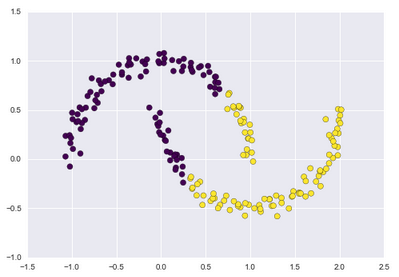 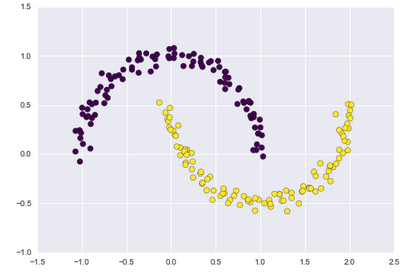

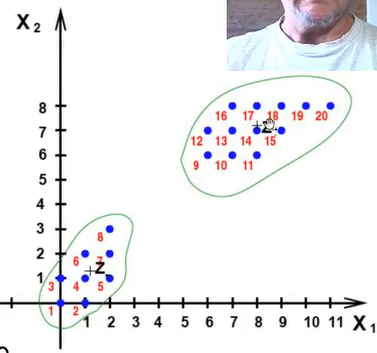

In [ ]:
# Debo eliminar los campos con valores No numericos (categoricos)
# df.drop(["Columna"], axis=1, inplace=True")

# Normalizar sobre la desviacion estandar:
"""
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet
"""
# Modeling
"""
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)
"""


'\nclusterNum = 3\nk_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)\nk_means.fit(X)\nlabels = k_means.labels_\nprint(labels)\n'

### MODELOS DE MEZCLA GAUSSIANA (GMM)
* Debido a las debilidades de K-Means:
  - falta de flexibilidad en la forma del grupo (siempre es circular)
  - falta de asignacion de probabilidades a su decision (solo toma la menor distancia, sin tener en cuenta los demas centroides)

Un modelo de Mezcla Gaussiano intenta encontrar una mezcla de distribuciones de probabilidad gaussianas multidimensionales que modelen mejor cualquier conjunto de datos de entrada:
  - flexibiliza la forma del grupo (depende de la distribucion de los puntos)
  - asigna probabilidades a cada punto

https://jakevdp-github-io.translate.goog/PythonDataScienceHandbook/05.12-gaussian-mixtures.html?_x_tr_sl=auto&_x_tr_tl=es&_x_tr_hl=es-419

In [ ]:
from sklearn.mixture import GMM

gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)

### MEAN SHIFT
Es un algoritmo para inducir modas locales en un espacion de atributos continuos (Ej de la mariposa ue se pinta con solo 4 colores)

### KDE: Estimacion de la Densidad de Kernel

https://jakevdp-github-io.translate.goog/PythonDataScienceHandbook/05.13-kernel-density-estimation.html?_x_tr_sl=auto&_x_tr_tl=es&_x_tr_hl=es-419

### CLUSTERING JERARQUICOS
Metodo divisivo, basado en un unico parametro TITA (fraccion de distancia)

In [ ]:
# importo las librerias necesarias:
"""
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
"""
# creo el objeto y le paso los datos:
"""
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

agglom.fit(X1,y1)
"""
# grafico:
"""
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()
"""
# Computo la matriz de proximidad:
"""
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)
y chanan, me devuelve la grafica del arbol jerarquico.
"""

### DBSCAN: Clustering basado en densidad

In [ ]:
"""
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)
"""
# visualizacion de los cluster basados en location:
"""
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm)
        ceny=np.mean(clust_set.ym)
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))
"""


## REDUCCION DE LA DIMENSIONALIDAD
Consiste en transformar el dataset original en otro de menor cantidad de atributos (tabla mas "angosta"), pero que retenga las propiedades significativas del original con respecto al proposito de analisis.

Desventajas de tener muchas columnas:
* poder de computo mayor
* al aumentar la dimensionalidad del espacio, la densidad de los datos baja exponencialmente
* las metricas de distancia pierden las propiedades intuitivas
* es mas complejo poder visualizar los datos en analisis exploratorio
* datos con muchos atributos tienen mucha probabilidad de tener atributos irrelevantes (raza del perro del que pidio el prestamo, etc.)

PROYECCION DE ATRIBUTOS

Estos metodos proyectan el espacio de atributos sobre un subespacio lineal (ej: hiperplano). el mas conocido es el PCA (Analisis de Componentes Principales).

 La matriz de covariancza es semidefinida positiva y cada Auto Valor normalizado respecto a la suma total indica la varianza que se proyecta sobre cada autovector asociado --> Esto me indica la informacion que se "almacena" en cada atributo respecto al total.


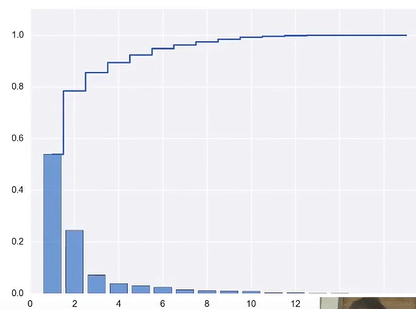

Ej: si Elijo los primeros 4 atributos como representacion total del dataset, tendria casi el 90% de la info original.

# #4 VALIDACIÓN DE LOS MODELOS

## APRENDIZAJE SUPERVISADO

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_hat)

NameError: ignored

#### CURVA ROC:
*  Muy util para determinar el valor umbral del clasificador de forma grafica.
*  Ejemplo del clasificador estadisitco parametrico de naranjas-mandarinas: Verdadero positivo, Falso positivo, Verdadero negativo, Falso negativo

#### OTRAS MEDIDAS DE EVALUACION DE MODELOS
Cuando las clases no son simetricas (parejas), podemos utilizar:
  * f-measure: (2*precision*recall)/(precision+recall)
  * Indice de Jaccard: TP/(TP+FP+FN), lo correctamente predecido / total predicciones

#### MATRIZ DE CONTINGENCIA:
Permite reconocer de forma mas grafica que tan acertado es nuestro modelo, compara valores predichos con los valores reales

In [ ]:
"""
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_reales, Y_predecidos)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabel=Y.names, yticklabels=Y.names)
plt.xlabel('valores reales')
plt.ylabel('valores predecidos')
"""
# metodo del curso de IBM Coursera
"""
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()
"""

"\nfrom sklearn.metrics import confusion_matrix\nmat = confusion_matrix(Y_reales, Y_predecidos)\nsns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabel=Y.names, yticklabels=Y.names)\nplt.xlabel('valores reales')\nplt.ylabel('valores predecidos')\n"

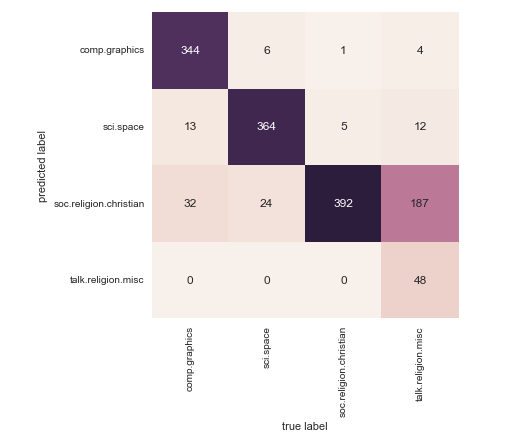

#### CURVA DE VALIDACION:
Curva que compara el desempeño del modelo para los datos de entrenamiento y los datos de validacion.

Muy util para encontrar el grado del polinomio que mejor se adapta a los datos utilizando un modelo de regresion polinomial.

In [ ]:
"""
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)   #rango de grados del polinomio: desde una constante hasta un polinomio de grado 21
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
"""

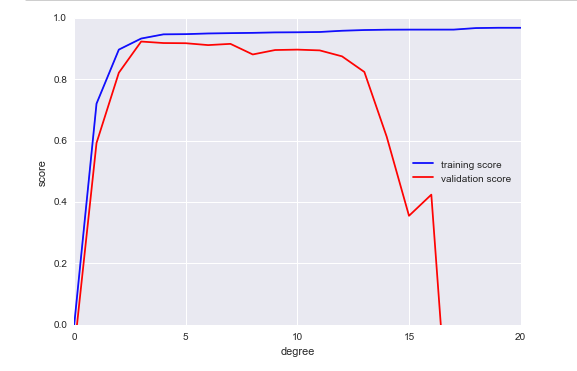

#### CURVA DE APRENDIZAJE:
Grafica de la puntuacion de entrenamiento/validacion con respecto al tamaño del conjunto de entrenamiento.

Util para saber cuantos puntos de entrenamiento se necesitan para entrenar de manera correcta un modelo. Cuando las curvas convergen, no sirve de nada seguir agregando puntos de entrenamiento.

La unica manera de mejorar el rendimiento es cambiando el modelo.

In [ ]:
"""
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')
"""

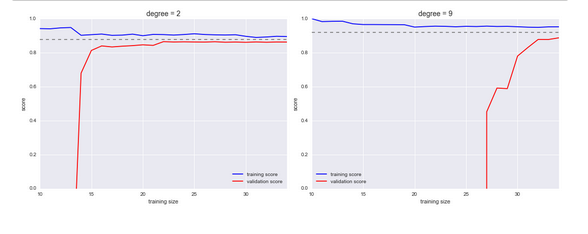


# #5 AUXILIARES

### DETECCION DE ATIPICOS
* Estadistica parametrica: los datos se pueden modelar con una distribucion de referencia (Distribucion normal por ejemplo), se pueden calcular los atipicos usando dicha distribucion: con la media y el desvio estandar. Valores umbrales: media +- 3 x desvio estandar.
Como puedo saber si los datos se comportan como una distribucion normal? --> Dibujo los datos en un HISTOGRAMA!!
* Estadistica NO parametrica: no tengo una distribucion de referencia. Lo puedo calcular mediante PERCENTILES. Calculo rango intercuartil (valor_75% - valor_25%) y los valores umbrales son:
  * min = 1er cuartil - 1.5 x rango intercuartil,
  * max = 3er cuartil + 1.5 x rango intercuartil

De forma grafica: BOXPLOT


### GRID SEARCH
Es un metodo de la libreria Scikit Learn que permite evaluar un modelo con combinaciones de hiperparametros y nos devuelve la performance para cada combinacion. Util para modelos con varios hiperparametros.
 Ej: K vecinos mas cercanos:
  * Cual seria un K optimo en base a nuestro dataset?
  * Tamaño del conjunto de entrenamiento

In [ ]:
# Ej de SVM:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(estimator=svm, param_grid = parameters)
svm_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

## Evaluacion del modelo de forma grafica
* i] Regression plot
* ii] Residual plot
* iii] Distribution plot

In [ ]:
#i]
"""
sns.regplot(X="columna1", Y="Columna2", data=df)
"""
# ii]
"""
sns.residplot(df["Columna1"], df["Columna2])    #Columna1: indepte., Columna2: target
# para modelos lineales bien elegidos, el residual PLOT es un conjunto de puntos con media CERO.
# si el modelo lineal no es la mejor alternativa, veremos un residual PLOT con otras caracteristicas:
# en el ejemplo se veia una cuadratica.
"""
# iii]
"""
ax1=sns.distplot(df["Price"], hist=False)
sns.distplot(Yhat, hist=False, ax=ax1)
"""

'\nax1=sns.distplot(df["Price"], hist=False)\nsns.distplot(Yhat, hist=False, ax=ax1)\n'

### Github de Manlio: Aprendizaje de Maquina
https://github.com/manlio99/Materia-de-aprendizaje/?fbclid=IwAR2USVXfDhhUD07-TfUzAIeqxo05sG2FBmtPVdIj55dk4RZgyAXuPAn3nog

## APLICACION: PipeLine de Deteccion de Rostros

**HOG**: Histograma de Gradientes Orientados

Es una tecnica de extraccion de caracteristicas (en este ejemplo trabajaremos con imagenes), que transforma los pixeles de la imagen en una representacion vectorial que es sensible a las caracteristicas de la imagen ampliamente informativas, independientemente de los factores de confusion como la iluminacion:

    1. Opcionalmente pre-normalizar imágenes. Esto conduce a características que resisten la dependencia de las variaciones en la iluminación.
    2. Convolucione la imagen con dos filtros que son sensibles a los gradientes de brillo horizontales y verticales. Estos capturan información de bordes, contornos y texturas.
    3. Subdivida la imagen en celdas de un tamaño predeterminado y calcule un histograma de las orientaciones de gradiente dentro de cada celda.
    4. Normalice los histogramas en cada celda comparándolos con el bloque de celdas vecinas. Esto suprime aún más el efecto de iluminación en la imagen.
    5. Construya un vector de características unidimensional a partir de la información de cada celda.


Un extractor HOG rapido esta integrado en el proyecto Scikit-Image:

In [ ]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features')

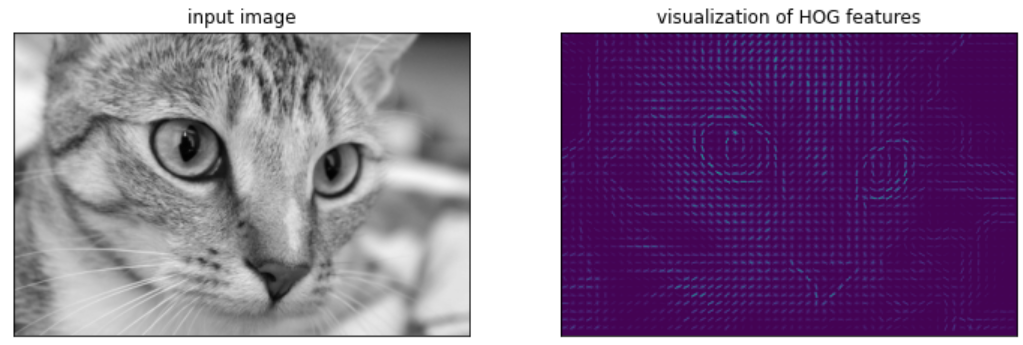